# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.014828e+01     7.132656e+00
 * time: 0.004967927932739258
     1     2.754948e+01     3.731975e+00
 * time: 0.015257835388183594
     2     2.212261e+01     6.685266e+00
 * time: 0.04235386848449707
     3     1.305318e+01     2.072981e+00
 * time: 0.0740058422088623
     4     1.222882e+01     2.913261e+00
 * time: 0.1654038429260254
     5     1.185524e+01     1.664128e+00
 * time: 0.18637490272521973
     6     1.101167e+01     1.264662e+00
 * time: 0.2082538604736328
     7     1.046792e+01     1.248358e+00
 * time: 0.23064899444580078
     8     1.011627e+01     1.036103e+00
 * time: 0.25502490997314453
     9     9.984403e+00     5.230324e-01
 * time: 0.2782599925994873
    10     9.916879e+00     4.039825e-01
 * time: 0.3017299175262451
    11     9.896640e+00     5.710106e-01
 * time: 0.31828784942626953
    12     9.849365e+00     5.041296e-01
 * time: 0.33373284339904785
    13     9.701138e+00     5.901053e-01
 * time: 0.

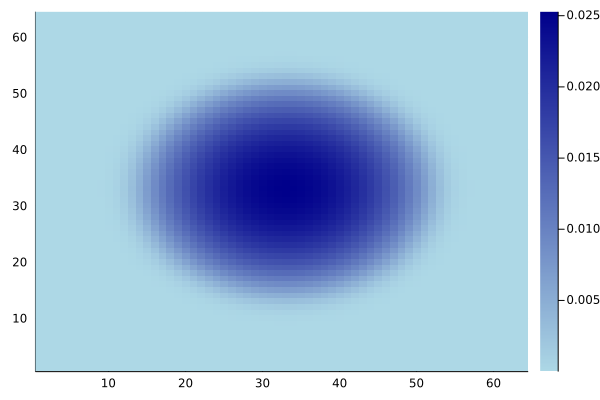

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)